## Data transform 2

For this, we will create a dataset where we will retain all outliers but focus on correcting skewers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
num_df = pd.read_csv('../data/raw/numerical.csv')

display(num_df)

,bedrooms,bathrooms,sqft_above,floors,sqft_lot15,sqft_living15,sqft_basement
0,3,1.00,1180,1.0,5650,1340,0
1,3,2.25,2170,2.0,7639,1690,400
2,2,1.00,770,1.0,8062,2720,0
3,4,3.00,1050,1.0,5000,1360,910
4,3,2.00,1680,1.0,7503,1800,0
...,...,...,...,...,...,...,...
21592,3,2.50,1530,3.0,1509,1530,0
21593,4,2.50,2310,2.0,7200,1830,0
21594,2,0.75,1020,2.0,2007,1020,0
21595,3,2.50,1600,2.0,1287,1410,0


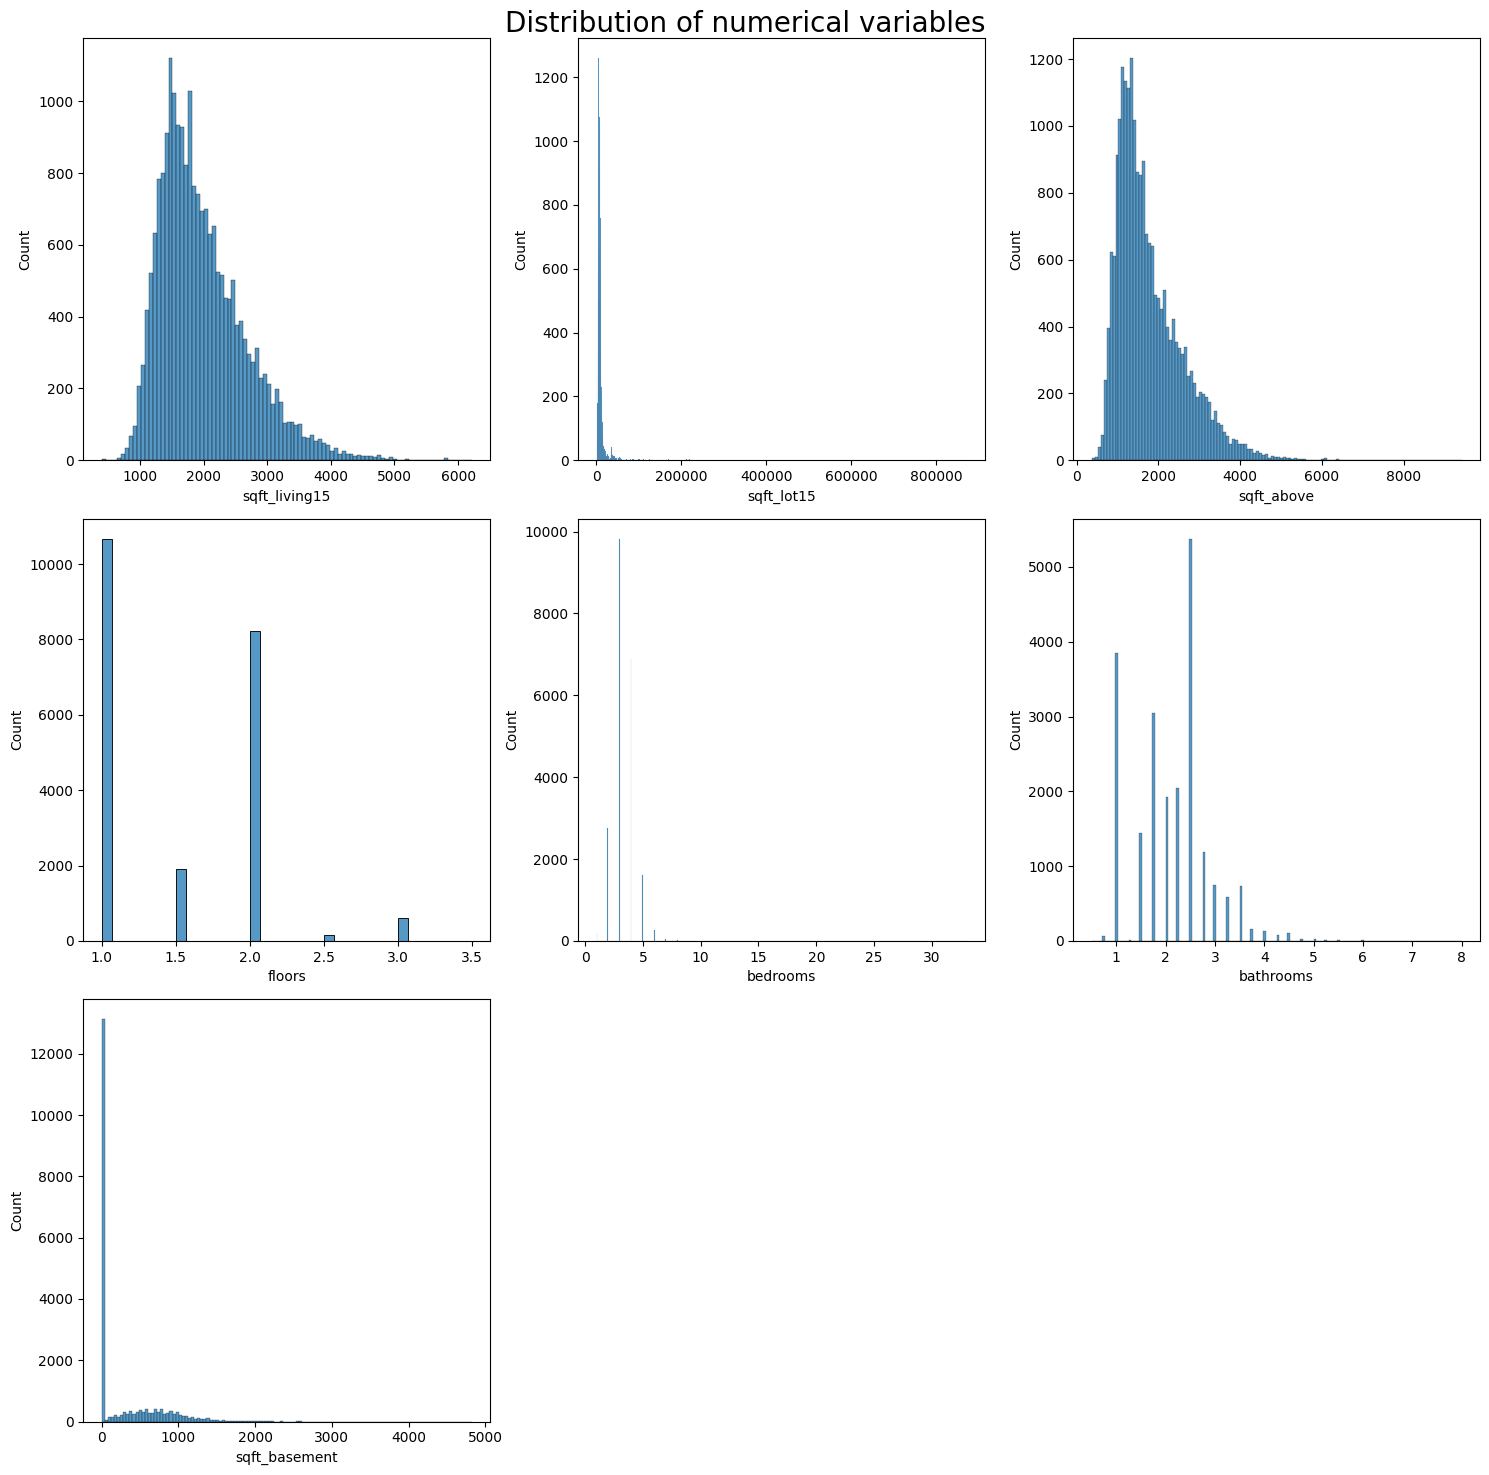

In [3]:
columns_to_plot = ["sqft_living15", "sqft_lot15", "sqft_above", "floors", "bedrooms", "bathrooms", "sqft_basement"]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribution of numerical variables', fontsize=20)


for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    sns.histplot(data=num_df, x=column, ax=axes[row, col])

# clear the extra subplots
for i in range(len(columns_to_plot), 3 * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [4]:
#see skewness
print(num_df.skew())

bedrooms         2.023641
bathrooms        0.519709
sqft_above       1.447434
floors           0.614497
sqft_lot15       9.524362
sqft_living15    1.106875
sqft_basement    1.576890
dtype: float64


we will apply power tranformation on columns with value above 1

In [5]:
from sklearn.preprocessing import PowerTransformer

In [6]:
#transform data
pt = PowerTransformer()
pt.fit(num_df)


PowerTransformer()

In [7]:
num_transformed= pt.transform(num_df)

In [8]:
#cast to dataframe
num_transformed_df = pd.DataFrame(num_transformed, columns=num_df.columns)

In [10]:
#save transformed data
import os
import pickle
path = "../transformers/"
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "num_transformer.pkl" 
with open(path+filename, "wb") as file:
  pickle.dump(pt, file)

In [28]:
num_transformed_df

,bedrooms,bathrooms,sqft_above,floors,sqft_lot15,sqft_living15,sqft_basement
0,-0.350967,-1.583745,-0.737418,-0.975556,-0.341970,-1.043506,-0.802918
1,-0.350967,0.253141,0.705741,1.029872,0.057869,-0.294277,1.176767
2,-1.639211,-1.583745,-1.882200,-0.975556,0.126750,1.121919,-0.802918
3,0.729637,1.136818,-1.038881,-0.975556,-0.511161,-0.994463,1.300691
4,-0.350967,-0.071087,0.125114,-0.975556,0.034741,-0.097540,-0.802918
...,...,...,...,...,...,...,...
21592,-0.350967,0.561351,-0.096146,1.877584,-2.414324,-0.610480,-0.802918
21593,0.729637,0.561351,0.842224,1.029872,-0.018655,-0.046444,-0.802918
21594,-1.639211,-2.037696,-1.115067,1.029872,-1.918077,-1.977481,-0.802918
21595,-0.350967,0.561351,0.010309,1.029872,-2.704055,-0.875644,-0.802918


In [11]:
#check skewness
print(num_transformed_df.skew())


bedrooms         0.041866
bathrooms       -0.006563
sqft_above       0.013949
floors           0.176527
sqft_lot15      -0.115138
sqft_living15    0.005725
sqft_basement    0.450397
dtype: float64


In [12]:
display(num_transformed_df.shape)


(21597, 7)

## Categorical data

In [13]:
#import categorical data
cat_df = pd.read_csv('../data/cleaned/categorical_cleaned.csv')

In [14]:

cat_df.shape

(21597, 10)

## further handling location
we are going to handle zipcode, dropping the long and latituide . and encoding zip column

In [19]:
#drop zipcode, long, lat
cat_df = cat_df.drop(columns=['zipcode', 'long', 'lat'])

now we focus on encoding zip 

In [20]:
cat_df['zip'].value_counts()

zip
980    12624
981     8973
Name: count, dtype: int64

there are only two groups in the zip code, so we will use a simple label encoder

In [21]:
#encode zip with label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df['zip'] = le.fit_transform(cat_df['zip'])



In [22]:
#save label encoder
path = "../encoders/"
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "label_encoder_for_zipcode.pkl" 
with open(path+filename, "wb") as file:
  pickle.dump(le, file)

In [23]:
cat_df['zip'].value_counts()

zip
0    12624
1     8973
Name: count, dtype: int64

In [24]:
#import target
target_df = pd.read_csv('../data/cleaned/target.csv')

In [25]:
target_df.shape

(21597, 2)

#concat the three dataframes

In [26]:
df = pd.concat([num_transformed_df, cat_df, target_df], axis=1)

df.shape

(21597, 16)

In [27]:
#save data
df.to_csv('../data/cleaned/data_with_outliers.csv', index=False)